In [1]:
import os
import qcodes as qc
import nanotune as nt
from nanotune.fit.pinchofffit import PinchoffFit
from nanotune.tests.data_generator_methods import populate_db_pinchoffs


Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jana/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


Qcodes Logfile : /Users/jana/.qcodes/logs/210727-27455-qcodes.log


Set up a database with synthetic data

In [2]:
db_name = 'temp_po.db'
db_folder = os.getcwd()
if not os.path.isfile(os.path.join(db_name, db_folder)):
    nt.new_database('temp_po.db', db_folder)
    e = qc.new_experiment("pinchoff_demo", sample_name="mock_pinchoff")
    populate_db_pinchoffs()

nt.set_database(db_name, db_folder)

0it [00:00, ?it/s]

Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]

Upgrading database; v0 -> v1: : 0it [00:00, ?it/s]

  0%|                                                                                   | 0/1 [00:00<?, ?it/s]

Upgrading database; v1 -> v2:   0%|                                                     | 0/1 [00:00<?, ?it/s]

Upgrading database; v1 -> v2: 100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 278.47it/s]

0it [00:00, ?it/s]

Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]

Upgrading database; v2 -> v3: : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]

Upgrading database; v3 -> v4: : 0it [00:00, ?it/s]

  0%|                                                                                   | 0/1 [00:00<?, ?it/s]

Upgrading database; v4 -> v5:   0%|                                                     | 0/1 [00:00<?, ?it/s]

Upgrading database; v4 -> v5: 100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 310.07it/s]

0it [00:00, ?it/s]

Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]

Upgrading database; v5 -> v6: : 0it [00:00, ?it/s]

  0%|                                                                                   | 0/1 [00:00<?, ?it/s]

Upgrading database; v6 -> v7:   0%|                                                     | 0/1 [00:00<?, ?it/s]

Upgrading database; v6 -> v7: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 86.05it/s]

  0%|                                                                                   | 0/1 [00:00<?, ?it/s]

Upgrading database; v7 -> v8:   0%|                                                     | 0/1 [00:00<?, ?it/s]

Upgrading database; v7 -> v8: 100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 287.68it/s]

  0%|                                                                                   | 0/1 [00:00<?, ?it/s]

Upgrading database; v8 -> v9:   0%|                                                     | 0/1 [00:00<?, ?it/s]

Upgrading database; v8 -> v9: 100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 231.17it/s]


Starting experimental run with id: 1. 
Starting experimental run with id: 2. 


Starting experimental run with id: 3. 


Starting experimental run with id: 4. 


Starting experimental run with id: 5. 


Starting experimental run with id: 6. 
Starting experimental run with id: 7. 
Starting experimental run with id: 8. 


Starting experimental run with id: 9. 


Starting experimental run with id: 10. 


### Initialize a PinchoffFit

It takes a QCoDeS run id (int), the name of the database where the data is stored and optionally the folder where the the database is stored.

In [3]:
pf = PinchoffFit(1, db_name, db_folder=db_folder)

### Fitting procedure
Specifically, `find_fit` uses the following methods to extract the desired features: 
- `compute_initial_guess`: Computes bounds and an initial guess for amplitude, slope and offset of the hyperbolic tangent the pinchoff curve is fitted to.
- `fit_fct` and `scipy.optimize.least_squares`: Optimize for *a*, *b*, *c* in  *fit_fct = a (1 + np.tanh(b  v + c))*.
- `compute_transition_interval`: Determine low and hig voltages: the voltages between which a gate pinches off. Per default, the method takes the first derivate of either the normalized signal or fit and checks for which voltages it is higher than `gradient_percentile`. These voltages define the transition interval. Using this gradient strength comparison allows capture the entire interval. Compared to using for example the second derivate, the voltage interval will also include voltages where the signal reaches zero or saturation. It also provides a knob to increase or decrease the interval by changing `gradient_percentile` if required.
- `compute_transition_voltage`: The transition is defined to occur at the maximum of the first derivative of either the normalized signal or the fit.
- `save_features`: Method defined in the class DataFit which PinchoffFit inherits from and which saves all features into a single dict.

In [4]:
pf.find_fit()

### Features
Features are extracted with the `find_fit` method and saved in the `features` attribute. Each trace (e.g. different readout sources) are fitted seperately. The readout methods used in the synthetic data example are `transport` and `sensing`.

In [5]:
pf.features

{'transport': {'amplitude': 0.500227648716049,
  'slope': 44.64589784862593,
  'offset': -22.32363435676256,
  'tanh_sign': 0.9999999999999999,
  'residuals': 0.003257225432900735,
  'low_voltage': -0.0529411764705882,
  'low_signal': 0.00278046450154695,
  'high_voltage': -0.0470588235294118,
  'high_signal': 0.99721953549845,
  'transition_voltage': -0.0504201680672269,
  'transition_signal': 0.4123686284590007,
  'max_signal': 1.0,
  'min_signal': 0.0},
 'sensing': {'amplitude': 0.5193952500227647,
  'slope': 40.63504513596012,
  'offset': -20.40780028393566,
  'tanh_sign': 0.7906272790025457,
  'residuals': 0.027007546880435003,
  'low_voltage': -0.0529411764705882,
  'low_signal': 0.1106555492851263,
  'high_voltage': -0.0470588235294118,
  'high_signal': 0.8462645572210317,
  'transition_voltage': -0.0495798319327731,
  'transition_signal': 0.5620627106146739,
  'max_signal': 0.9977081782784228,
  'min_signal': 0.0019109830961756035}}

### Visualization

PinchoffFit has two methods to visualize the data and fitting features: 
- `plot_fit`: Shows the normalized trace together with its smoothed version, gradient and fit. It also indicated high, low and transition voltage found during fitting. 
- `plot_features`: Illustrates some of the features extracted during fitting and used for classification. Note that while high, low and transition voltage is required for further tuning, whereas high, low and transition current/signal is decisive for the measurement's quality. It does not matter where in voltage space a gate pinches off, but whether a gate is able to pinch off entirely for example.

(array([[<AxesSubplot:title={'center':'Pinchoff fit aaaaaaaa-0000-0000-0000-017ae876200a'}, xlabel='voltage x [V]', ylabel='transport [A]'>],
        [<AxesSubplot:title={'center':'Pinchoff fit aaaaaaaa-0000-0000-0000-017ae876200a'}, xlabel='voltage x [V]', ylabel='sensing [A]'>]],
       dtype=object),
 None)

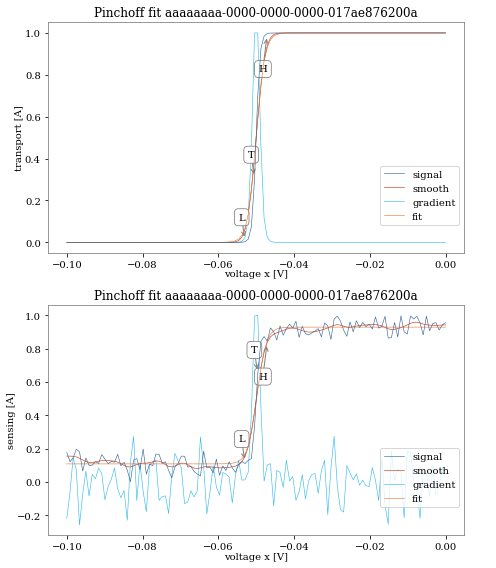

In [6]:
pf.plot_fit()

(array([[<AxesSubplot:title={'center':'Pinchoff features aaaaaaaa-0000-0000-0000-017ae876200a'}, xlabel='voltage x [V]', ylabel='transport [A]'>],
        [<AxesSubplot:title={'center':'Pinchoff features aaaaaaaa-0000-0000-0000-017ae876200a'}, xlabel='voltage x [V]', ylabel='sensing [A]'>]],
       dtype=object),
 None)

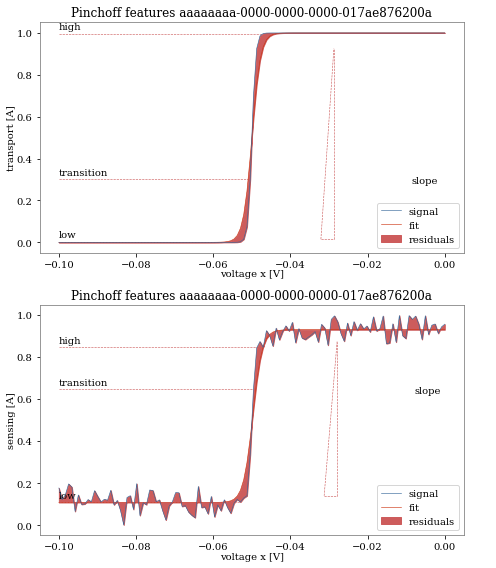

In [7]:
pf.plot_features()